In [52]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

In [53]:
image_folder = "/mnt/AdityaAshokBarot/afhq/train"

BATCH_SIZE = 128

transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = datasets.ImageFolder(image_folder, transform = transform)
train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)


In [97]:
class Discriminator(nn.Module):
    
    def __init__(self, in_channels):
        
        super(Discriminator, self).__init__()
        
        self.discriminator = nn.Sequential(nn.Conv2d(in_channels, 64, 4, 2, 1), nn.LeakyReLU(0.2),
                                           nn.Conv2d(64, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.LeakyReLU(0.2),
                                           nn.Conv2d(128, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.LeakyReLU(0.2),
                                           nn.Conv2d(256, 512, 4, 2, 1), nn.BatchNorm2d(512), nn.LeakyReLU(0.2),
                                           nn.Conv2d(512, 1, 4, 2, 0), nn.Sigmoid())
        
    def forward(self, x):
        
        output_prob = self.discriminator(x)
        
        return output_prob
    
class Generator(nn.Module):
    
    def __init__(self, latent_dim):
        
        super(Generator, self).__init__()
        
        self.generator = nn.Sequential(nn.ConvTranspose2d(latent_dim, 1024, 4, 2, 0), nn.BatchNorm2d(1024), nn.ReLU(),
                                       nn.ConvTranspose2d(1024, 512, 4, 2, 1), nn.BatchNorm2d(512), nn.ReLU(),
                                       nn.ConvTranspose2d(512, 256, 4, 2, 1), nn.BatchNorm2d(256), nn.ReLU(),
                                       nn.ConvTranspose2d(256, 128, 4, 2, 1), nn.BatchNorm2d(128), nn.ReLU(),
                                       nn.ConvTranspose2d(128, 3, 4, 2, 1), nn.Tanh())
    
    def forward(self, z):
        
        x_cap = self.generator(z)
        
        return x_cap
    
def initialize_weights(model):
    
    for m in model.modules():
        
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.normal_(m.weight.data, 0, 0.02)

In [98]:
disc = Discriminator(3)
disc(torch.randn(1, 3, 64, 64))

gen = Generator(100)
gen(torch.randn(1, 100, 1, 1)).shape


torch.Size([1, 3, 64, 64])

In [99]:
LATENT_DIM = 100
IN_CHANNELS = 3



generator = Generator(LATENT_DIM).to("cuda")
discriminator = Discriminator(IN_CHANNELS).to("cuda")

initialize_weights(generator)
initialize_weights(discriminator)

generator.train(), discriminator.train()

(Generator(
   (generator): Sequential(
     (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2))
     (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU()
     (3): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
     (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (5): ReLU()
     (6): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
     (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (8): ReLU()
     (9): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
     (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (11): ReLU()
     (12): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
     (13): Tanh()
   )
 ),
 Discriminator(
   (discriminator): Sequential(
     (0): Conv2d(3, 64, kernel

In [100]:
writer_real = SummaryWriter("logs/Real")
writer_generated = SummaryWriter("logs/Generated")
step = 0

FIXED_NOISE = torch.randn(32, 100, 1, 1).to("cuda")

In [101]:
import torch.optim as optim

criterion = nn.BCELoss()

generator_optim = optim.Adam(generator.parameters(), lr = 0.0002, betas = (0.5, 0.999))
discriminator_optim = optim.Adam(discriminator.parameters(), lr = 0.0002, betas = (0.5, 0.999))

In [102]:
import matplotlib.pyplot as plt
import numpy as np

EPOCH: 1/10, BATCH: 0/115, GENERATOR LOSS: 0.7956458330154419, DISCRIMINATOR LOSS:1.3866004943847656


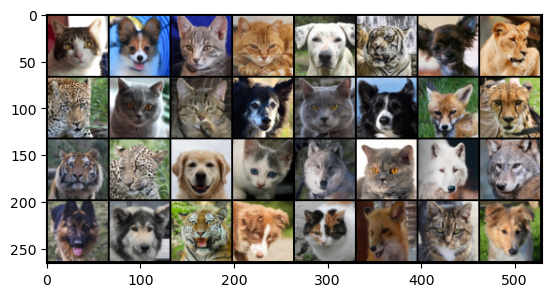

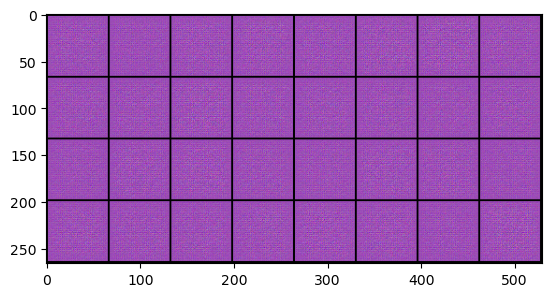

EPOCH: 2/10, BATCH: 0/115, GENERATOR LOSS: 2.865690231323242, DISCRIMINATOR LOSS:0.3833317756652832


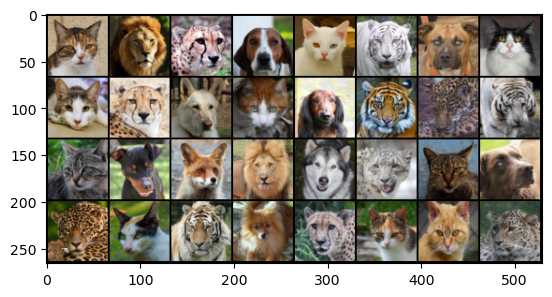

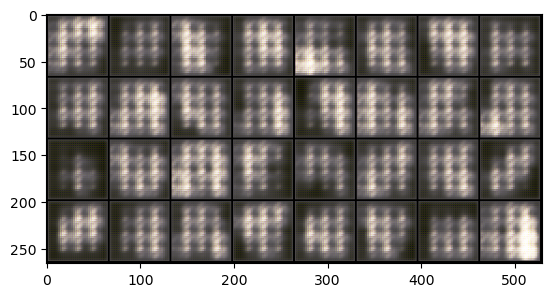

EPOCH: 3/10, BATCH: 0/115, GENERATOR LOSS: 3.03059720993042, DISCRIMINATOR LOSS:1.1706397533416748


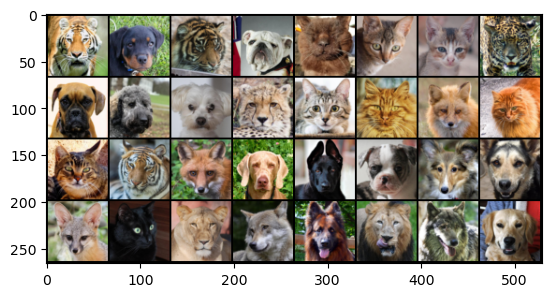

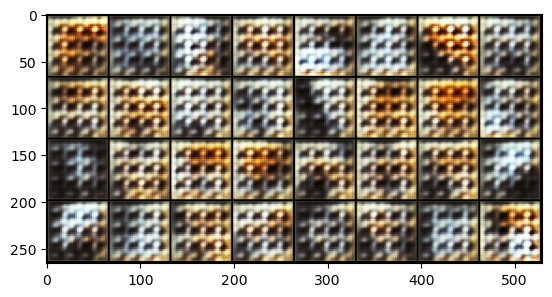

EPOCH: 4/10, BATCH: 0/115, GENERATOR LOSS: 2.1072750091552734, DISCRIMINATOR LOSS:0.9129045009613037


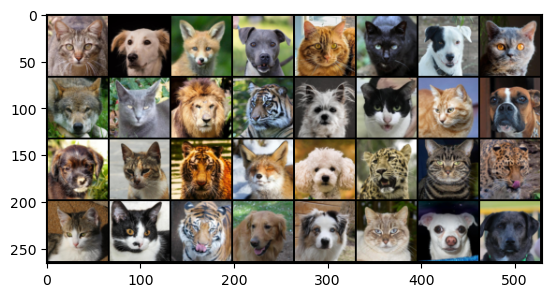

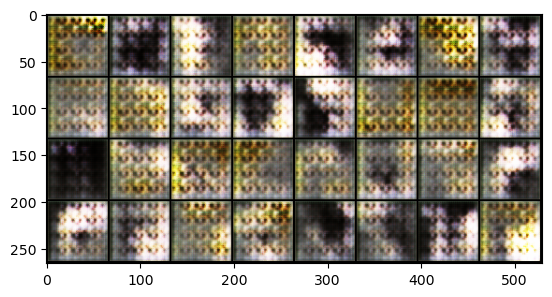

EPOCH: 5/10, BATCH: 0/115, GENERATOR LOSS: 3.3570635318756104, DISCRIMINATOR LOSS:1.525085210800171


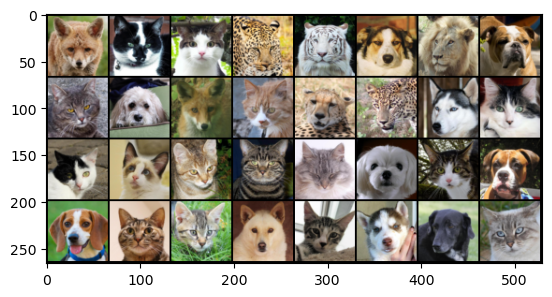

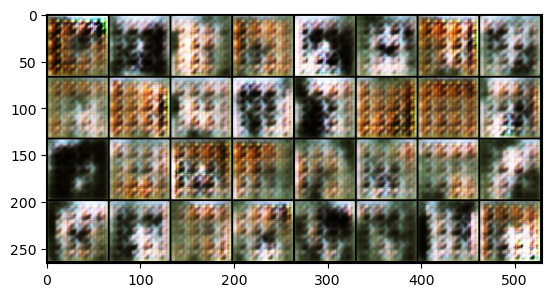

EPOCH: 6/10, BATCH: 0/115, GENERATOR LOSS: 2.5887835025787354, DISCRIMINATOR LOSS:1.0157856941223145


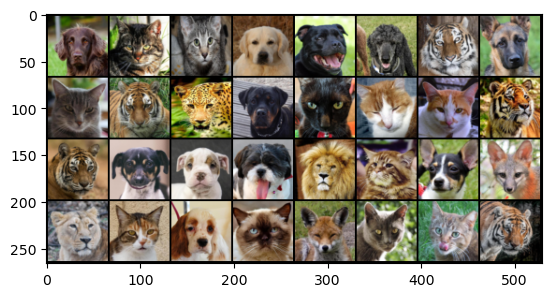

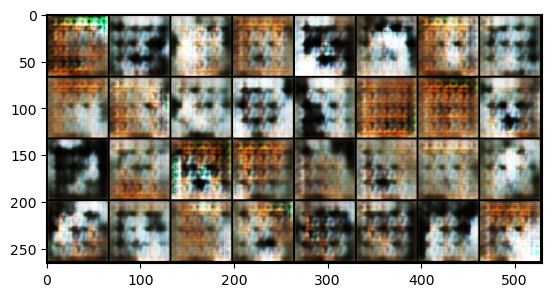

EPOCH: 7/10, BATCH: 0/115, GENERATOR LOSS: 1.5024645328521729, DISCRIMINATOR LOSS:1.0689195394515991


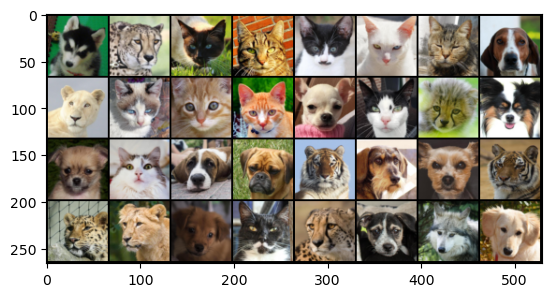

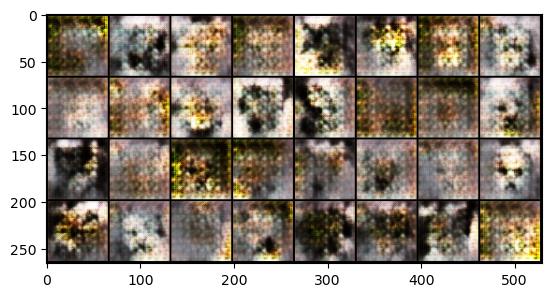

EPOCH: 8/10, BATCH: 0/115, GENERATOR LOSS: 1.8286556005477905, DISCRIMINATOR LOSS:1.0043365955352783


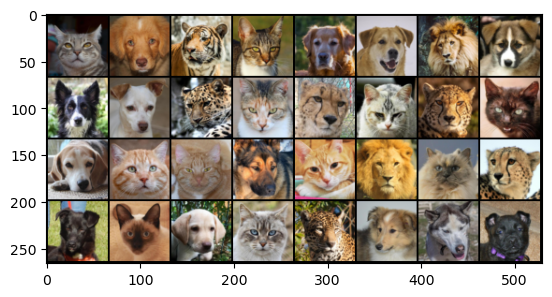

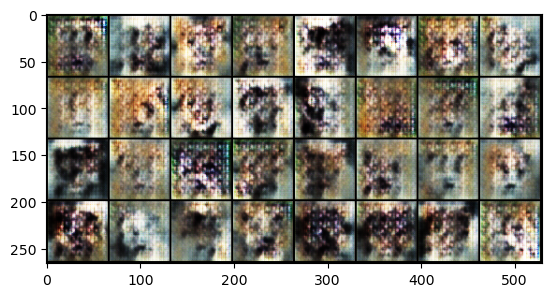

EPOCH: 9/10, BATCH: 0/115, GENERATOR LOSS: 2.048046588897705, DISCRIMINATOR LOSS:0.9273136854171753


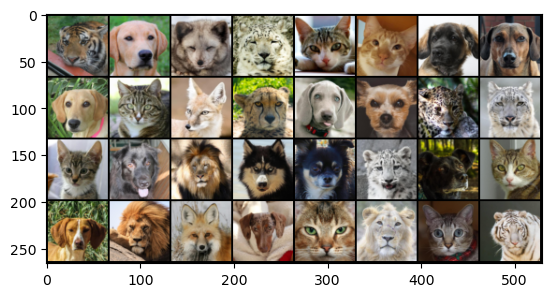

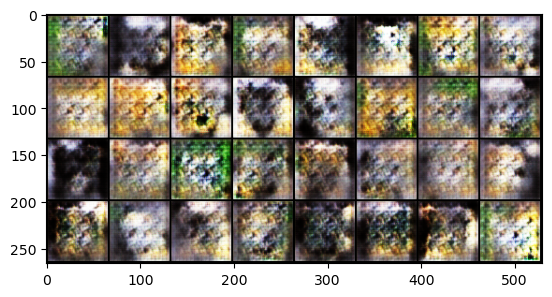

EPOCH: 10/10, BATCH: 0/115, GENERATOR LOSS: 1.885666847229004, DISCRIMINATOR LOSS:1.0871660709381104


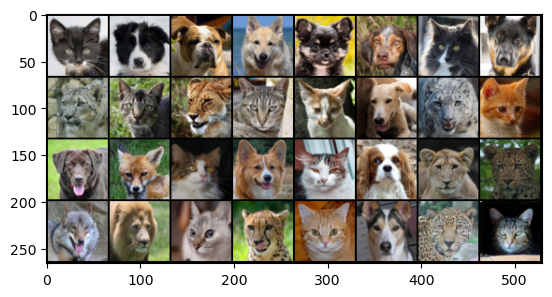

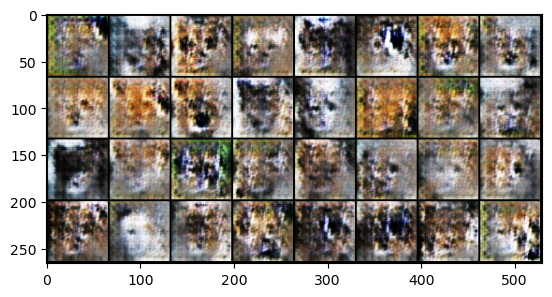

In [103]:
EPOCHS = 10

for epoch in torch.arange(EPOCHS):
    
    for batch_idx, (images, _) in enumerate(train_dataloader):
        
    
        #training Discriminator
        discriminator.zero_grad()
        
        noise = torch.randn(BATCH_SIZE, 100, 1, 1).to("cuda")
        
        images = images.to("cuda")
        generated = generator(noise).to("cuda")
        
        output_real_prob = discriminator(images).view(-1)
        output_fake_prob = discriminator(generated).view(-1)
        
        disc_real_loss = criterion(output_real_prob, torch.ones_like(output_real_prob))     #D(x)
        disc_fake_loss = criterion(output_fake_prob, torch.zeros_like(output_fake_prob))   # 1-D(G(z))
        
        disc_total_loss = disc_real_loss + disc_fake_loss
        
        disc_total_loss.backward(retain_graph = True)
        discriminator_optim.step()
        
        #training generator
        
        generator.zero_grad()
    
        output_fake_prob2 =  discriminator(generated).view(-1)
        
        gen_disc_loss = criterion(output_fake_prob2, torch.ones_like(output_fake_prob2))  # min(1 - D(G(z))) --> max(D(G(z)))
        
        gen_disc_loss.backward()
        generator_optim.step()
        
        
        if batch_idx % 115 == 0:
            
            print("EPOCH: {0}/{1}, BATCH: {2}/{3}, GENERATOR LOSS: {4}, DISCRIMINATOR LOSS:{5}".format(epoch+1, EPOCHS, batch_idx, len(train_dataloader), gen_disc_loss, disc_total_loss))
            
            with torch.no_grad():
                
                generated_images = generator(FIXED_NOISE)
                generated_images = generated_images.cpu()
                image_grid_real = make_grid(images[:32].cpu(), normalize = True)
                image_grid_generated = make_grid(generated_images[:32], normalize = True)
                
                plt.imshow(np.transpose(image_grid_real, (1, 2, 0)))
                plt.show()
                plt.imshow(np.transpose(image_grid_generated, (1, 2, 0)))
                plt.show()
                # writer_real.add_image("Real", image_grid_real, global_step = step)
                # writer_generated.add_image("Generated", image_grid_generated, global_step = step)
                
            # step = step + 1
            
        
        